In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

# Loading of data

In [2]:
data=pd.read_csv('../input/googleplaystore.csv',encoding='utf-8')

In [3]:
data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
0         4.1      159                 19M      10,000+  Free     0   
1         3.9      967                 14M     500,000+  Free     0   
2         4.7    87510                8.7M   5,000,000+  Free     0   
3         4.5   215644                 25M  50,000,000+  Free     0   
4         4.3      967                2.8M     100,000+  Free     0   
...       ...      ...                 ...          ...   ...   ...   
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [4]:
# checking nan values.....
data.isnull().sum()


App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
# missing value percentage....
(data.isnull().sum()/data.shape[0])*100

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.000000
Genres             0.009224
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
dtype: float64

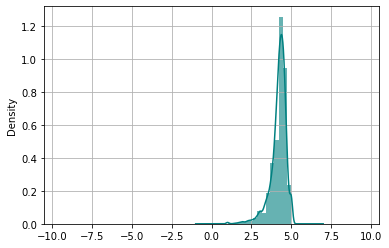

In [6]:
# hist plot for rating.......
xt=data['Rating'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Rating"].plot(kind='density', color='teal')

plt.grid()
plt.xlim(-10.5,10.5)
plt.show()

# Data cleaning 

In [7]:
# cleaning of rating data
t_data=data[pd.notnull(data['Rating'])]

# mean,median,mode
mean=np.mean(t_data['Rating'])
median=np.median(t_data['Rating'])
mode=sc.mode(t_data['Rating'])

print(mean,median,mode)

4.1915127575531175 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


In [8]:
# rating is right skewed so take median in place of nan
data['Rating'].fillna(median,inplace=True)

# In other features missing value % is not considrable so drop nan
data.dropna(inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [10]:
# Remove dublicate values

(data.duplicated().value_counts()/data.shape[0])*100

False    95.539754
True      4.460246
dtype: float64

In [11]:
data.drop_duplicates(inplace=True) 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  int64  
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Data preprocessing

In [13]:
# converting last date
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['before update']=data['Last Updated'].max()-data['Last Updated']


In [14]:
data['Installs']=data['Installs'].str.replace(',','').str.replace('+','').astype('int')
 

In [15]:
# converting review to int
data['Reviews']=data['Reviews'].astype('int')

In [16]:
# converting size
data['Size']=data['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [17]:
data['Price']=data['Price'].str.replace('$','').astype('float')

In [18]:
data.describe()

Rating       Reviews          Size      Installs         Price  \
count  10346.00000  1.034600e+04  1.034600e+04  1.034600e+04  10346.000000   
mean       4.20377  4.063338e+05  1.816602e+07  1.417266e+07      1.031561   
std        0.48573  2.698179e+06  2.214556e+07  8.028090e+07     16.287252   
min        1.00000  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%        4.10000  3.200000e+01  2.700000e+06  1.000000e+03      0.000000   
50%        4.30000  1.688500e+03  9.100000e+06  1.000000e+05      0.000000   
75%        4.50000  4.659825e+04  2.600000e+07  1.000000e+06      0.000000   
max        5.00000  7.815831e+07  1.000000e+08  1.000000e+09    400.000000   

                     before update  
count                        10346  
mean   266 days 09:08:14.799922676  
std    398 days 09:11:37.912373048  
min                0 days 00:00:00  
25%               20 days 00:00:00  
50%               80 days 00:00:00  
75%              337 days 18:00:00  
max             3001 days 00:00:00

# Data visualisation 

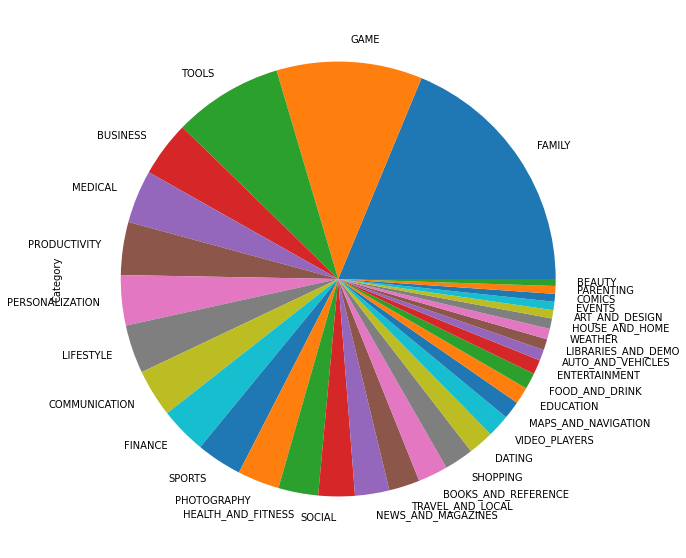

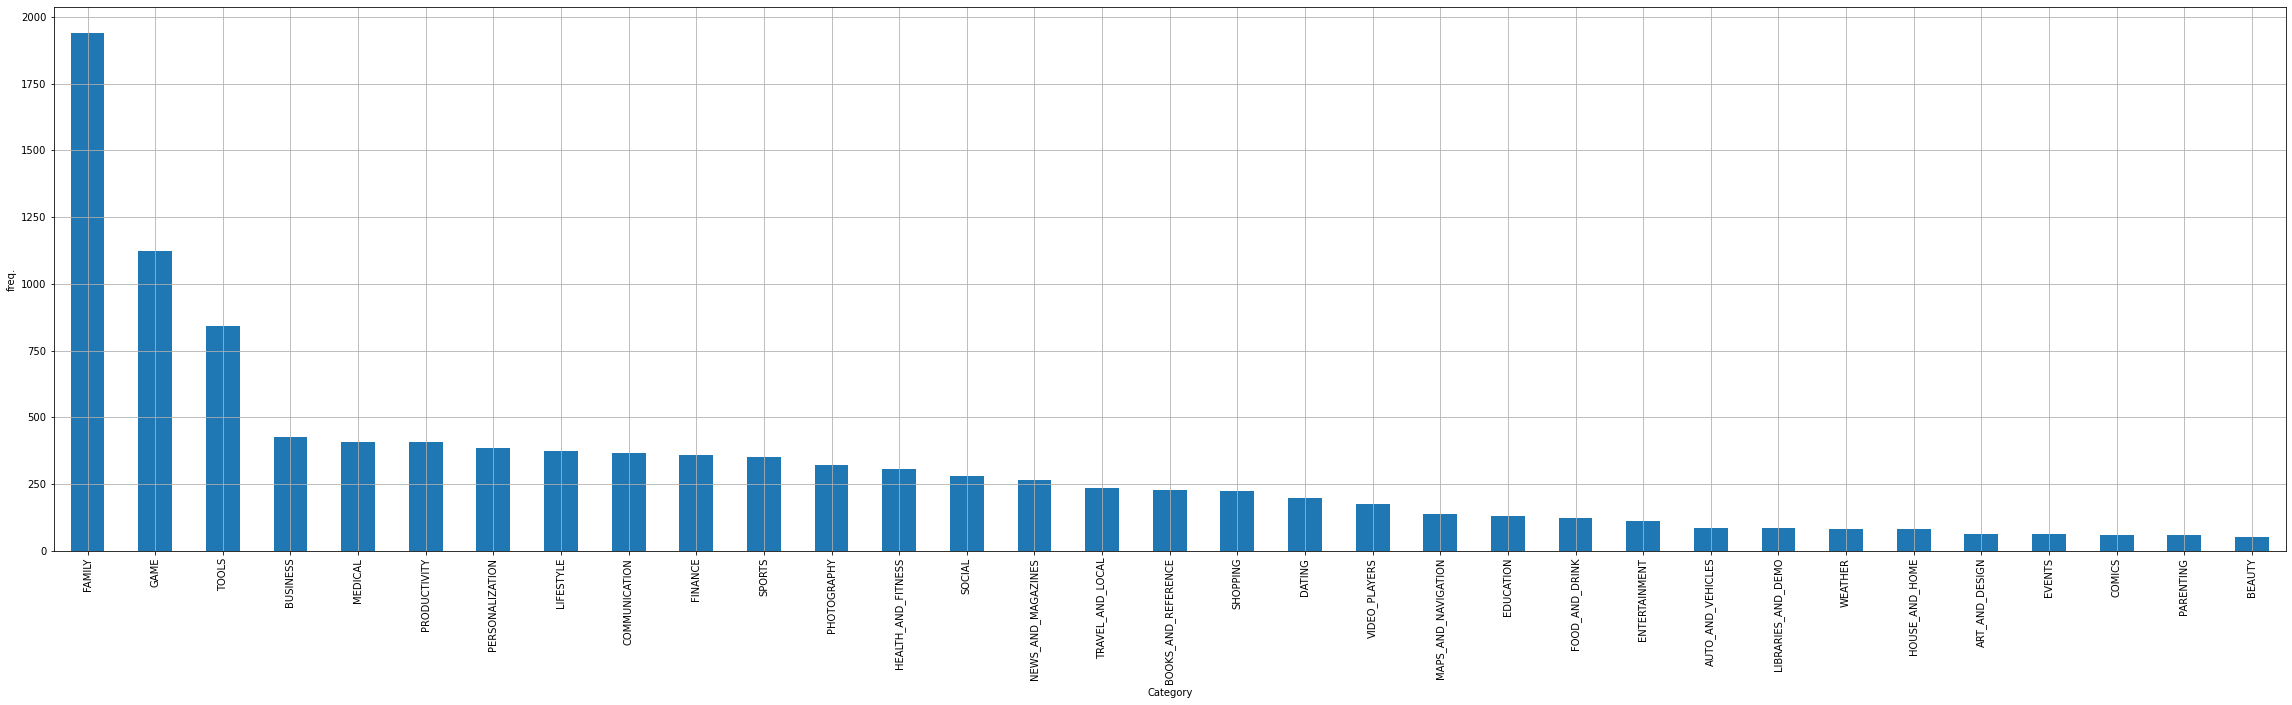

In [19]:
# most Most popular category
plt.figure(figsize=(40,10))
data['Category'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(40,10))
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

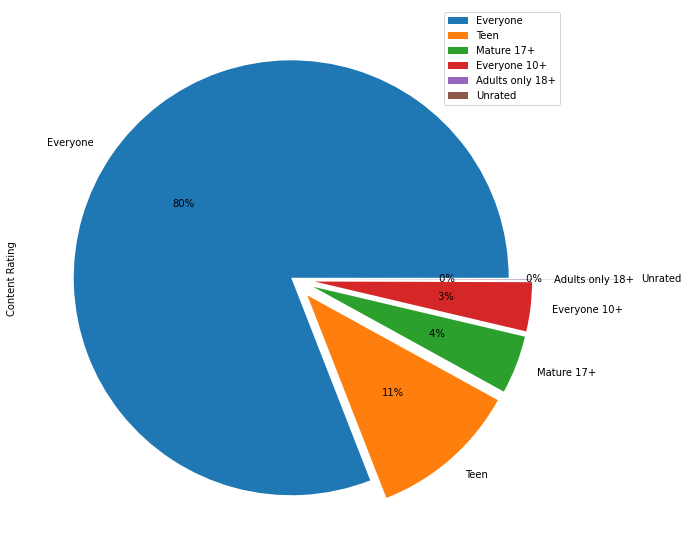

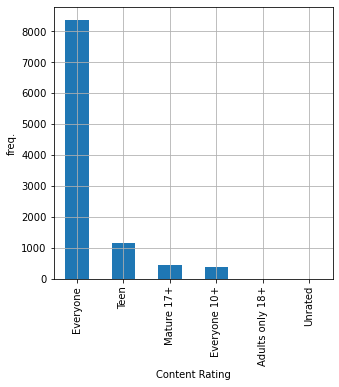

In [20]:
#  Content Rating 
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data['Content Rating'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
data['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')

plt.grid()
plt.show()

In [21]:
data['Size'].value_counts()

0.0           1525
11000000.0     187
13000000.0     186
12000000.0     186
14000000.0     181
              ... 
412000.0         1
309000.0         1
82000.0          1
913000.0         1
598000.0         1
Name: Size, Length: 456, dtype: int64

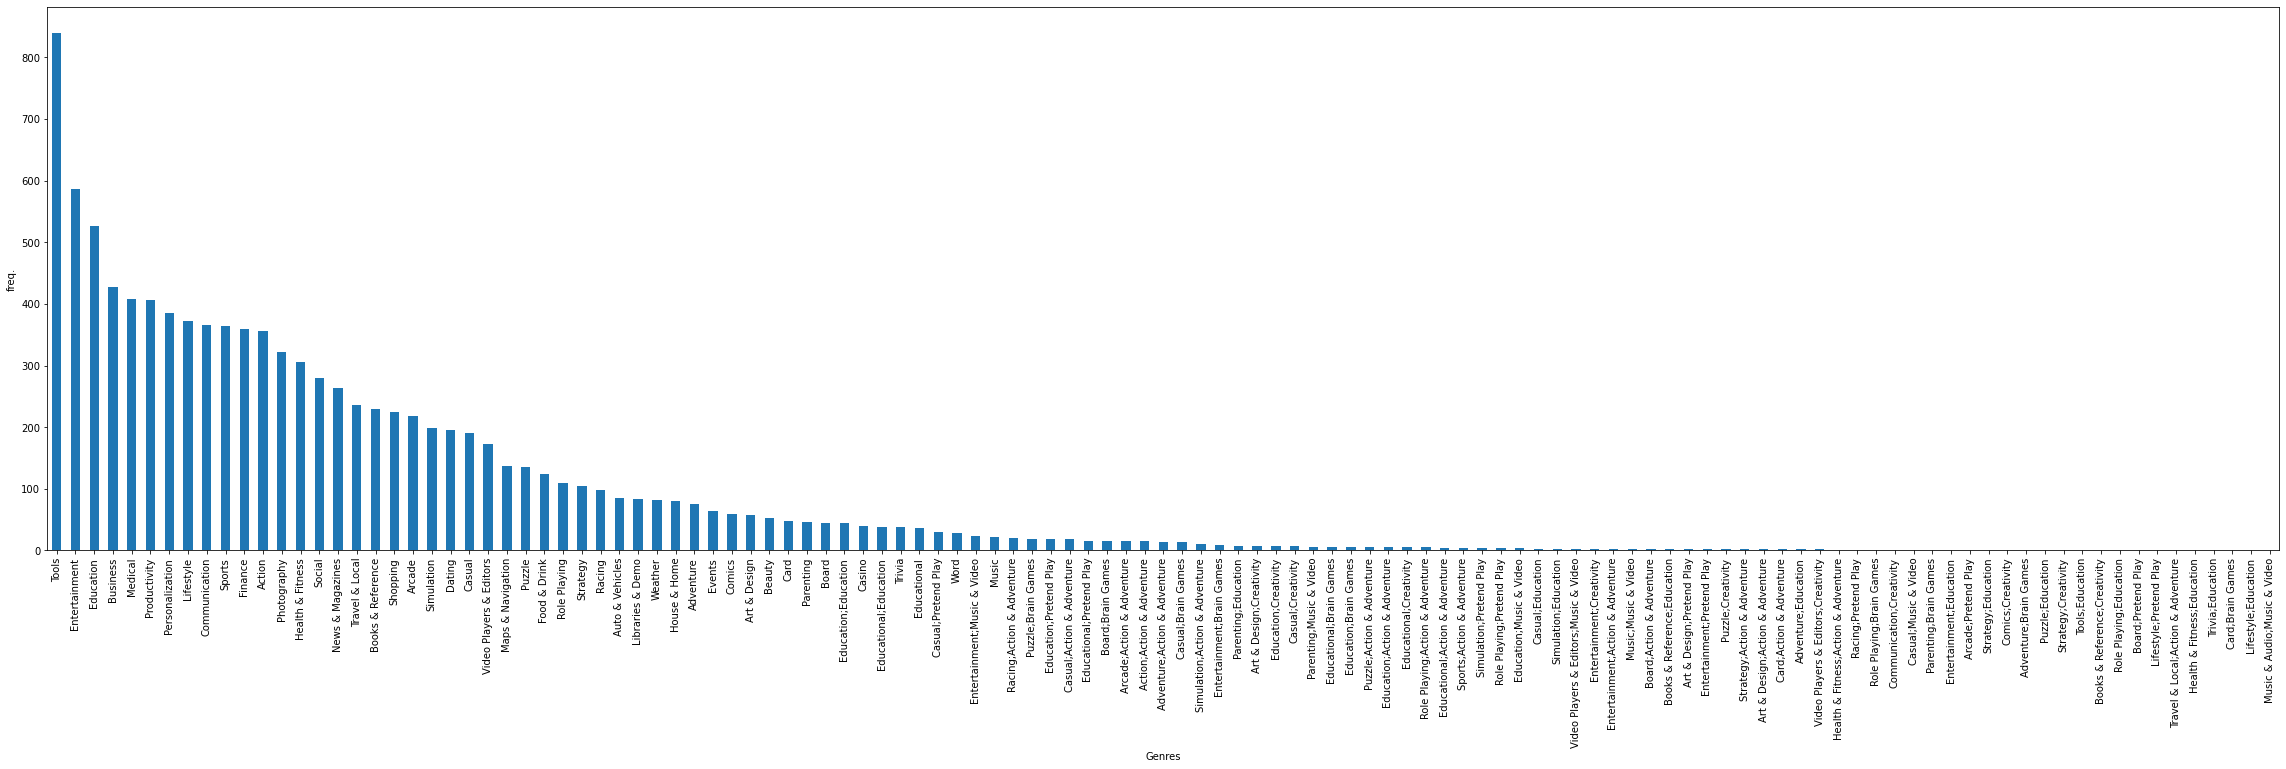

In [22]:
plt.figure(figsize=(40,10))
data['Genres'].value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.show()

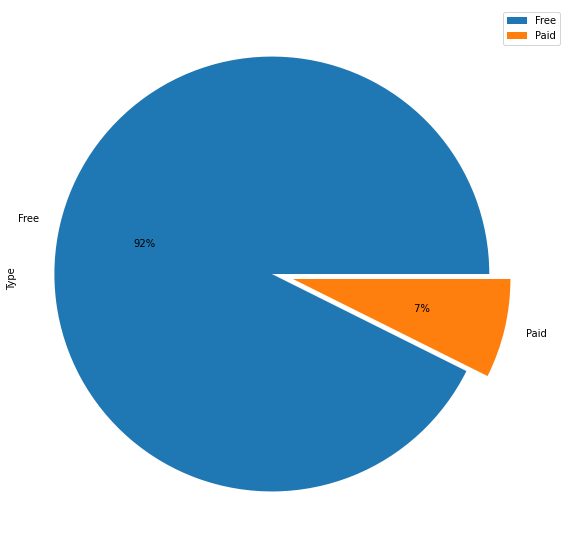

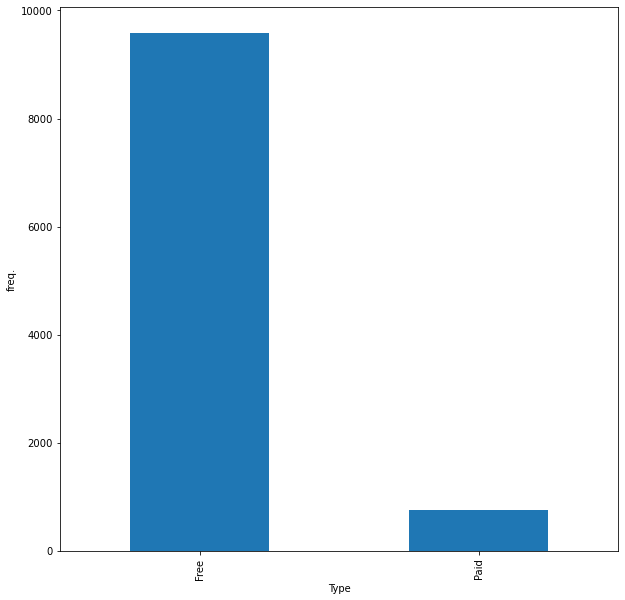

In [23]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['Type'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
data['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()

In [24]:
# max size app
data[data['Size']==data['Size'].max()]

App            Category  \
1080                                         Post Bank             FINANCE   
1565                    Talking Babsy Baby: Baby Games           LIFESTYLE   
1758                            Hungry Shark Evolution                GAME   
1793                 Mini Golf King - Multiplayer Game                GAME   
1988                            Hungry Shark Evolution                GAME   
2299                              Navi Radiography Pro             MEDICAL   
3973                            Hungry Shark Evolution                GAME   
4690                                        Vi Trainer  HEALTH_AND_FITNESS   
5427                                   Ultimate Tennis              SPORTS   
5530                       The Walking Dead: Our World                GAME   
5862                             Miami crime simulator                GAME   
5865                      Gangster Town: Vice District              FAMILY   
7404                                   SimCity BuildIt              FAMILY   
8409  Car Crash III Beam DH Real Damage Simulator 2018                GAME   
8847                        Draft Simulator for FUT 18              SPORTS   
9170                     Stickman Legends: Shadow Wars                GAME   

      Rating  Reviews         Size   Installs  Type  Price Content Rating  \
1080     4.5    60449  100000000.0    1000000  Free   0.00       Everyone   
1565     4.0   140995  100000000.0   10000000  Free   0.00       Everyone   
1758     4.5  6074334  100000000.0  100000000  Free   0.00           Teen   
1793     4.5   531458  100000000.0    5000000  Free   0.00       Everyone   
1988     4.5  6074627  100000000.0  100000000  Free   0.00           Teen   
2299     4.7       11  100000000.0        500  Paid  15.99       Everyone   
3973     4.5  6071542  100000000.0  100000000  Free   0.00           Teen   
4690     3.6      124  100000000.0       5000  Free   0.00       Everyone   
5427     4.3   183004  100000000.0   10000000  Free   0.00       Everyone   
5530     4.0    22435  100000000.0    1000000  Free   0.00           Teen   
5862     4.0   254518  100000000.0   10000000  Free   0.00     Mature 17+   
5865     4.3    65146  100000000.0   10000000  Free   0.00     Mature 17+   
7404     4.5  4218587  100000000.0   50000000  Free   0.00   Everyone 10+   
8409     3.6      151  100000000.0      10000  Free   0.00       Everyone   
8847     4.6   162933  100000000.0    5000000  Free   0.00       Everyone   
9170     4.4    38419  100000000.0    1000000  Paid   0.99   Everyone 10+   

                      Genres Last Updated   Current Ver   Android Ver  \
1080                 Finance   2018-07-23        2.9.12    4.0 and up   
1565  Lifestyle;Pretend Play   2018-07-16           9.0    4.0 and up   
1758                  Arcade   2018-07-25         6.0.0    4.1 and up   
1793                  Sports   2018-07-20        3.04.1  4.0.3 and up   
1988                  Arcade   2018-07-25         6.0.0    4.1 and up   
2299                 Medical   2018-01-14         1.2.0  4.0.3 and up   
3973                  Arcade   2018-07-25         6.0.0    4.1 and up   
4690        Health & Fitness   2018-08-02      2.0.0.11    5.0 and up   
5427                  Sports   2018-07-19     2.29.3118  4.0.3 and up   
5530                  Action   2018-08-01       1.1.0.3    5.0 and up   
5862                  Action   2018-07-09           2.0    4.0 and up   
5865              Simulation   2018-05-31           2.1    4.0 and up   
7404              Simulation   2018-06-19  1.23.3.75024    4.0 and up   
8409                  Racing   2018-05-20          1.03    4.1 and up   
8847                  Sports   2018-05-11          25.7    4.1 and up   
9170                  Action   2018-08-03        2.3.24    4.1 and up   

     before update  
1080       16 days  
1565       23 days  
1758       14 days  
1793       19 days  
1988       14 days  
2299      206 days  
3973       14 days  
4690

In [25]:
# max size install app
data[data['Installs']==data['Installs'].max()]

App             Category  Rating  \
152                          Google Play Books  BOOKS_AND_REFERENCE     3.9   
335   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
336                         WhatsApp Messenger        COMMUNICATION     4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
340                                      Gmail        COMMUNICATION     4.3   
341                                   Hangouts        COMMUNICATION     4.0   
382   Messenger – Text and Video Chat for Free        COMMUNICATION     4.0   
386                                   Hangouts        COMMUNICATION     4.0   
391              Skype - free IM & video calls        COMMUNICATION     4.1   
411               Google Chrome: Fast & Secure        COMMUNICATION     4.3   
451                                      Gmail        COMMUNICATION     4.3   
464                                   Hangouts        COMMUNICATION     4.0   
865                          Google Play Games        ENTERTAINMENT     4.3   
1654                            Subway Surfers                 GAME     4.5   
1700                            Subway Surfers                 GAME     4.5   
1750                            Subway Surfers                 GAME     4.5   
1872                            Subway Surfers                 GAME     4.5   
2544                                  Facebook               SOCIAL     4.1   
2545                                 Instagram               SOCIAL     4.5   
2554                                   Google+               SOCIAL     4.2   
2604                                 Instagram               SOCIAL     4.5   
2808                             Google Photos          PHOTOGRAPHY     4.5   
2853                             Google Photos          PHOTOGRAPHY     4.5   
2884                             Google Photos          PHOTOGRAPHY     4.5   
3117                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3127                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3223                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
3232                        Google Street View     TRAVEL_AND_LOCAL     4.2   
3234                                    Google                TOOLS     4.4   
3454                              Google Drive         PRODUCTIVITY     4.4   
3523                              Google Drive         PRODUCTIVITY     4.4   
3665                                   YouTube        VIDEO_PLAYERS     4.3   
3687                   Google Play Movies & TV        VIDEO_PLAYERS     3.7   
3736                               Google News   NEWS_AND_MAGAZINES     3.9   
3816                               Google News   NEWS_AND_MAGAZINES     3.9   
3896                            Subway Surfers                 GAME     4.5   
3904                        WhatsApp Messenger        COMMUNICATION     4.4   
3909                                 Instagram               SOCIAL     4.5   
3928                                   YouTube        VIDEO_PLAYERS     4.3   
3943                                  Facebook               SOCIAL     4.1   
3996              Google Chrome: Fast & Secure        COMMUNICATION     4.3   
4098                 Maps - Navigate & Explore     TRAVEL_AND_LOCAL     4.3   
4144                                   Google+               SOCIAL     4.2   
4150                                    Google                TOOLS     4.4   
4153                                  Hangouts        COMMUNICATION     4.0   
4170                              Google Drive         PRODUCTIVITY     4.4   
5395                             Google Photos          PHOTOGRAPHY     4.5   
5856                         Google Play Games               FAMILY     4.3   
9844                               Google News   NEWS_AND_MAGAZINES     3.9   

       Reviews        Size    Installs  Type  Price Content Rating  \
152    1433233        

In [26]:
# App which hasn't been updated
data[data['before update']==data['before update'].max()]

App Category  Rating  Reviews      Size  Installs  \
7479  FML F*ck my life + widget   FAMILY     4.2     1415  209000.0    100000   

      Type  Price Content Rating         Genres Last Updated Current Ver  \
7479  Free    0.0       Everyone  Entertainment   2010-05-21         3.1   

     Android Ver before update  
7479  1.5 and up     3001 days

In [27]:
# App with largest number of reviews
data[data['Reviews']==data['Reviews'].max()]

App Category  Rating   Reviews  Size    Installs  Type  Price  \
2544  Facebook   SOCIAL     4.1  78158306   0.0  1000000000  Free    0.0   

     Content Rating  Genres Last Updated         Current Ver  \
2544           Teen  Social   2018-08-03  Varies with device   

             Android Ver before update  
2544  Varies with device        5 days

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

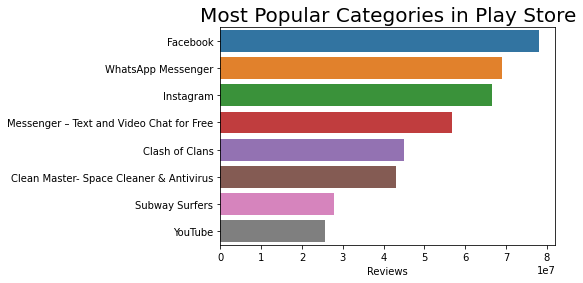

In [28]:
##B most reviewed apps
import seaborn as sns
sorte = data.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

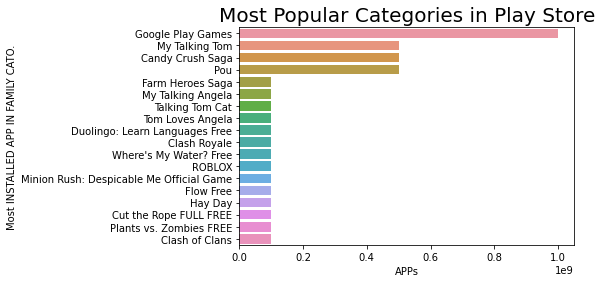

In [29]:
# most populer catogry by Family
data_cat=data[data['Category']=='FAMILY'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATO.')
ax.set_title("Most Popular Categories in Play Store", size = 20)


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

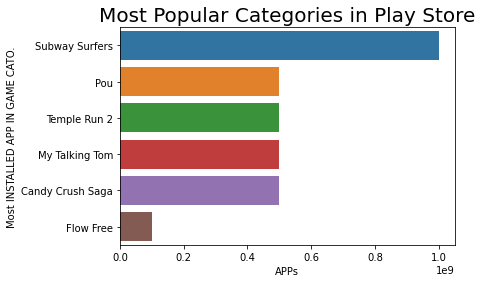

In [30]:
data_cat=data[data['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN GAME CATO.')
ax.set_title("Most Popular Categories in Play Store", size = 20)


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

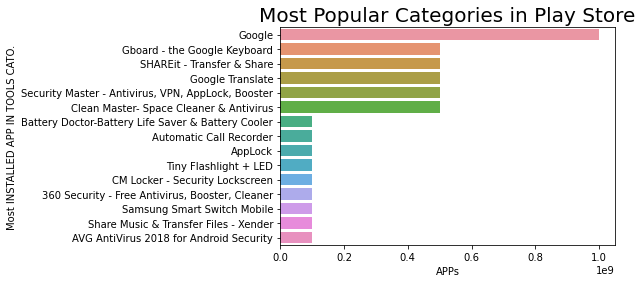

In [31]:
data_cat=data[data['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN TOOLS CATO.')
ax.set_title("Most Popular Categories in Play Store", size = 20)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

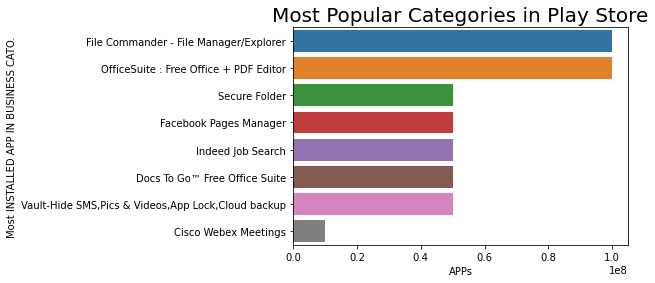

In [32]:
data_cat=data[data['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('APPs')
ax.set_ylabel('Most INSTALLED APP IN BUSINESS CATO.')
ax.set_title("Most Popular Categories in Play Store", size = 20)

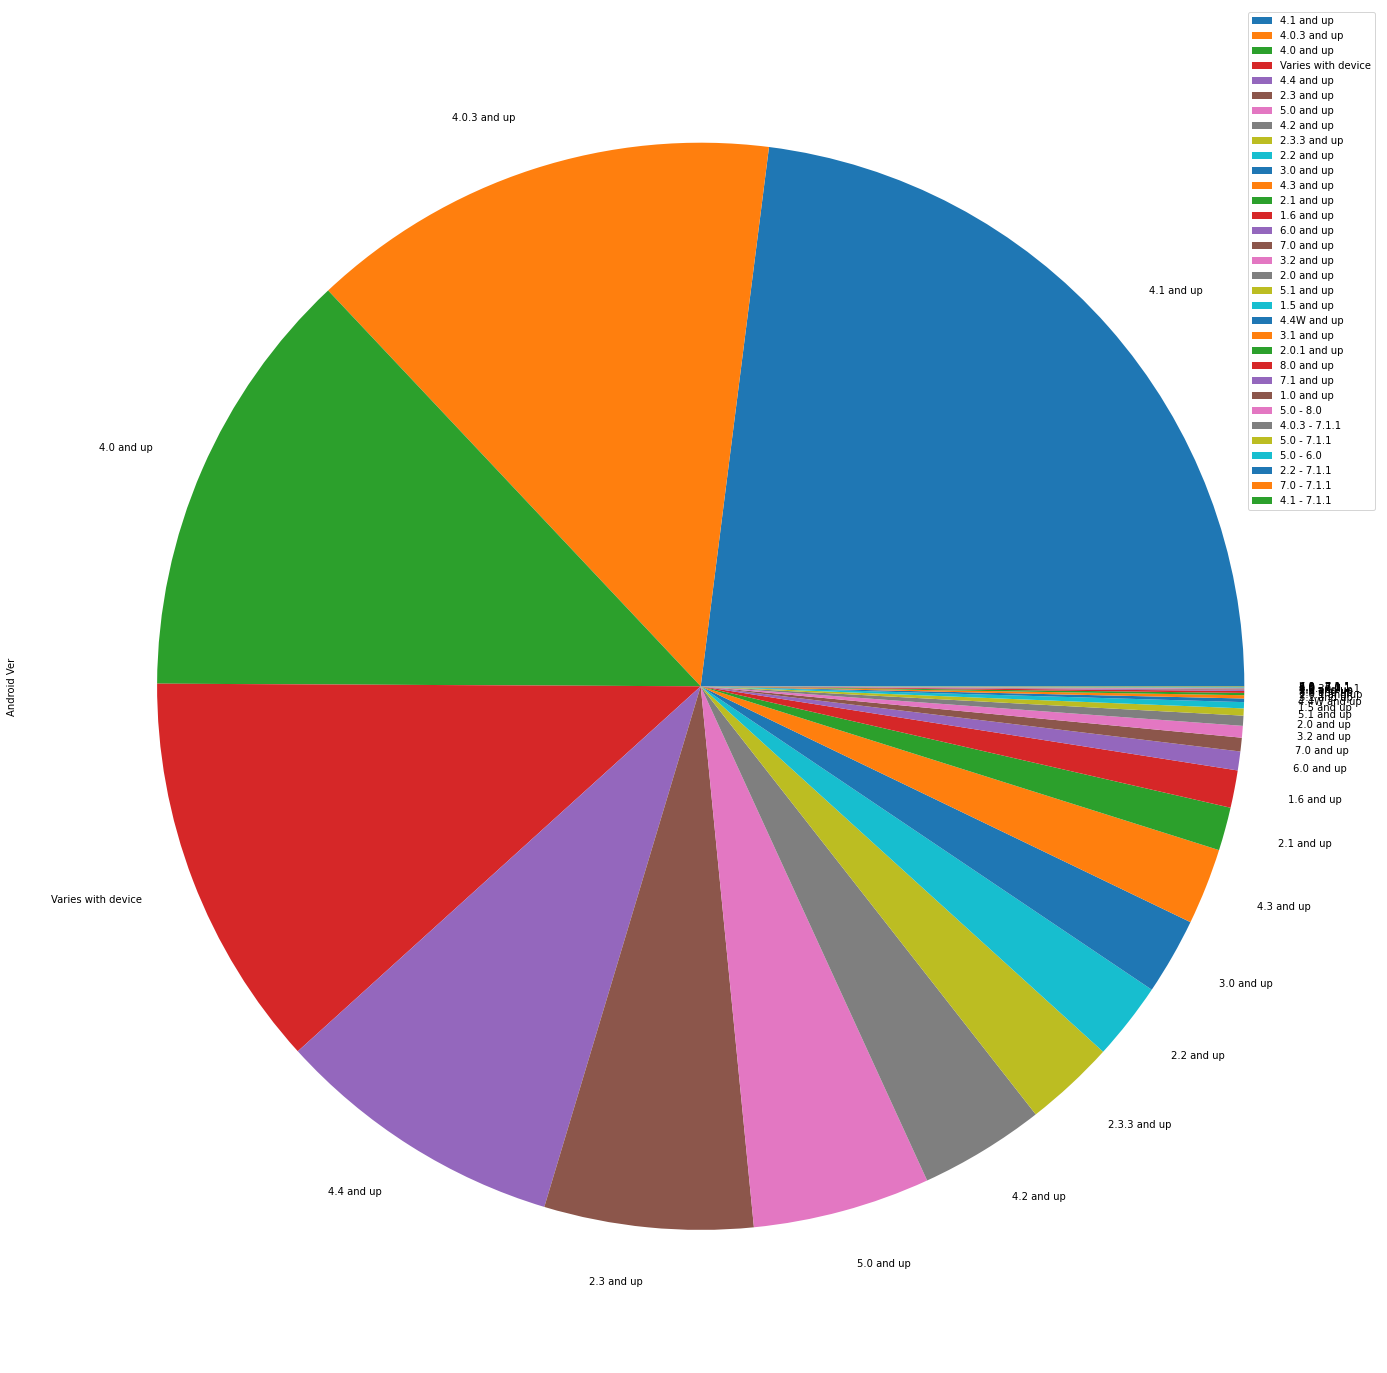

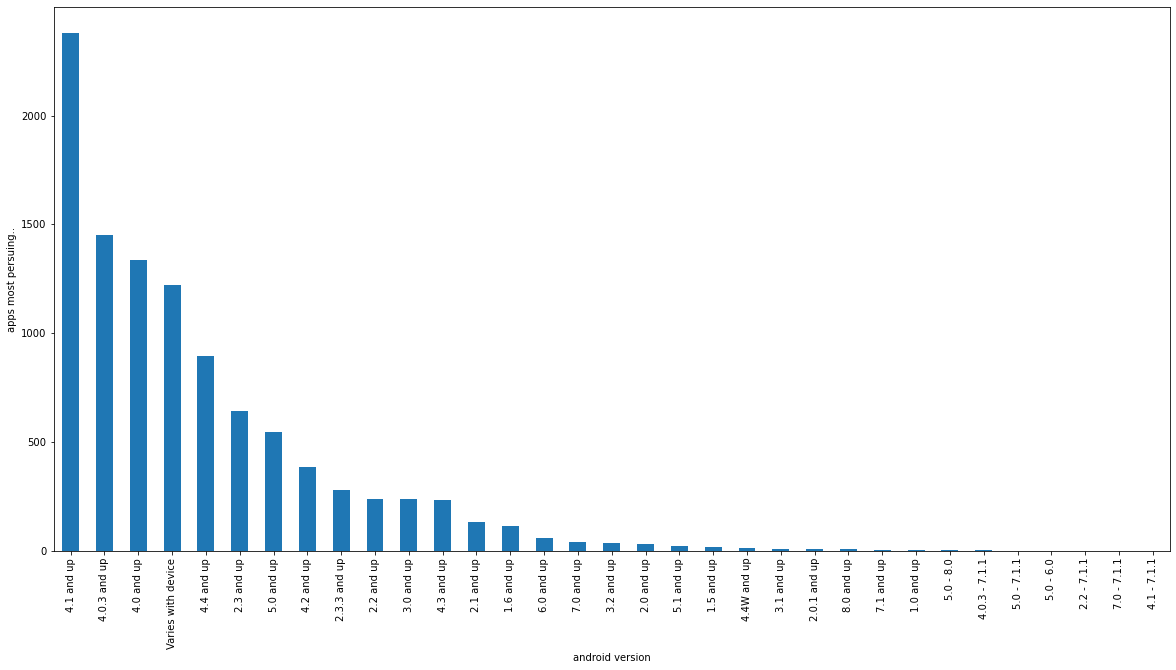

In [33]:
# most use version of android in android phones
plt.figure(figsize=(25,25))
data['Android Ver'].value_counts().plot(kind='pie')
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
data['Android Ver'].value_counts().plot(kind='bar')
plt.xlabel('android version')
plt.ylabel('apps most persuing..')

plt.show()

# DATA MODELING

In [34]:
# Data Modeling
data_model_x=data[['Category','Reviews','Size','Installs','Type','Price','Content Rating','Genres','before update']]
data_model_y=data[['Rating']]


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_model_x[['before update']])
data_model_x[['before update']]=scaler.transform(data_model_x[['before update']])

data_model_x

C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\77338\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Category  Reviews        Size  Installs  Type  Price  \
0           ART_AND_DESIGN      159  19000000.0     10000  Free    0.0   
1           ART_AND_DESIGN      967  14000000.0    500000  Free    0.0   
2           ART_AND_DESIGN    87510   8700000.0   5000000  Free    0.0   
3           ART_AND_DESIGN   215644  25000000.0  50000000  Free    0.0   
4           ART_AND_DESIGN      967   2800000.0    100000  Free    0.0   
...                    ...      ...         ...       ...   ...    ...   
10836               FAMILY       38  53000000.0      5000  Free    0.0   
10837               FAMILY        4   3600000.0       100  Free    0.0   
10838              MEDICAL        3   9500000.0      1000  Free    0.0   
10839  BOOKS_AND_REFERENCE      114         0.0      1000  Free    0.0   
10840            LIFESTYLE   398307  19000000.0  10000000  Free    0.0   

      Content Rating                     Genres  before update  
0           Everyone               Art & Design       0.070976  
1           Everyone  Art & Design;Pretend Play       0.068311  
2           Everyone               Art & Design       0.002333  
3               Teen               Art & Design       0.020327  
4           Everyone    Art & Design;Creativity       0.016328  
...              ...                        ...            ...  
10836       Everyone                  Education       0.126291  
10837       Everyone                  Education       0.010996  
10838       Everyone                    Medical       0.188271  
10839     Mature 17+          Books & Reference       0.432189  
10840       Everyone                  Lifestyle       0.004665  

[10346 rows x 9 columns]

In [36]:
## one-hot encoding of Category,Content Rating,Type,Genres
encoded_x=pd.get_dummies(data_model_x, columns=['Category',"Content Rating","Type","Genres"])

In [37]:
# train and test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(encoded_x,data_model_y,random_state=0)

In [38]:
x_train

Reviews        Size  Installs  Price  before update  \
1299     27393  59000000.0   1000000    0.0       0.007664   
994       1575  43000000.0    100000    0.0       0.008664   
6827        69   3100000.0      1000    0.0       0.126624   
10727      222  16000000.0     50000    0.0       0.004332   
6251     35479  16000000.0   1000000    0.0       0.009330   
...        ...         ...       ...    ...            ...   
9716        13   1500000.0       100    0.0       0.421526   
5319    218451   4700000.0  10000000    0.0       0.026658   
3692      5555  64000000.0   1000000    0.0       0.008997   
10337        2  10000000.0       100    0.0       0.009997   
3130    459851         0.0  10000000    0.0       0.002333   

       Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
1299                         0                           0                0   
994                          0                           0                0   
6827                         0                           0                0   
10727                        0                           0                0   
6251                         0                           0                0   
...                        ...                         ...              ...   
9716                         0                           0                0   
5319                         0                           0                0   
3692                         0                           0                0   
10337                        0                           0                0   
3130                         0                           0                0   

       Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  \
1299                              0                  0  ...   
994                               0                  0  ...   
6827                              0                  0  ...   
10727                             0                  0  ...   
6251                              0                  0  ...   
...                             ...                ...  ...   
9716                              0                  0  ...   
5319                              1                  0  ...   
3692                              0                  0  ...   
10337                             0                  0  ...   
3130                              0                  0  ...   

       Genres_Tools;Education  Genres_Travel & Local  \
1299                        0                      0   
994                         0                      0   
6827                        0                      0   
10727                       0                      0   
6251                        0                      0   
...                       ...                    ...   
9716                        0                      0   
5319                        0                      0   
3692                        0                      0   
10337                       0                      0   
3130                        0                      1   

       Genres_Travel & Local;Action & Adventure  Genres_Trivia  \
1299                                          0              0   
994                                           0              0   
6827                                          0              0   
10727                                         0              0   
6251                                          0              0   
...                                         ...            ...   
9716                                          0              0   
5319                                          0              0   
3692                                          0              0   
10337                                         0              0   
3130                                          0              0   

       Genres_Trivia;Education  Genres_Video Players & Editors  \
1299                    

In [39]:
y_train.shape,y_test.shape

((7759, 1), (2587, 1))

In [40]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [41]:
x_train.shape,x_test.shape

((7759, 165), (2587, 165))

In [42]:
# Appling linear_regression

from sklearn.linear_model import LinearRegression
cls=LinearRegression()

cls.fit(x_train,y_train)
cls.predict(x_test)

array([[4.1059363 ],
       [4.37925173],
       [4.41440798],
       ...,
       [4.32944704],
       [4.40073611],
       [4.15561892]])

In [43]:
cls.score(x_train,y_train)


0.050271528220631634

In [44]:
cls.score(x_test,y_test)

-1.3402839010078811e+24

In [45]:
# using support vector regressor

from sklearn import svm

In [46]:
clf=svm.SVR(C=2.0,epsilon=0.3)
clf.fit(x_train,y_train)


C:\Users\77338\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=2.0, epsilon=0.3)

In [47]:
clf.predict(x_test)

array([4.07981936, 4.39969247, 4.56204509, ..., 4.28457769, 4.40413616,
       4.25956541])

In [48]:
clf.score(x_train,y_train)

0.08708876658797293

In [49]:
clf.score(x_test,y_test)

0.04225119069939154

In [50]:
# from neural network

from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

Using TensorFlow backend.


In [51]:
layer1=Dense(units=500,activation='relu',input_dim=165)
model.add(layer1)
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='relu'))


In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [53]:
model.fit(x_train,y_train,epochs=25,batch_size=50,validation_data=(x_test,y_test))

Train on 7759 samples, validate on 2587 samples
Epoch 1/25
7759/7759 [==============================] - 1s 171us/step - loss: -47.3169 - accuracy: 0.0113 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 2/25
7759/7759 [==============================] - 1s 94us/step - loss: -49.1033 - accuracy: 0.0094 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 3/25
7759/7759 [==============================] - 1s 73us/step - loss: -49.1033 - accuracy: 0.0094 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 4/25
7759/7759 [==============================] - 1s 88us/step - loss: -49.1033 - accuracy: 0.0094 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 5/25
7759/7759 [==============================] - 1s 80us/step - loss: -49.1033 - accuracy: 0.0094 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 6/25
7759/7759 [==============================] - 1s 76us/step - loss: -49.1033 - accuracy: 0.0094 - val_loss: -48.9172 - val_accuracy: 0.0112
Epoch 7/25
7759/7759 [==============================] - 1

In [54]:
score=model.evaluate(x_test,y_test)
score

2587/2587 [==============================] - 0s 56us/step


[-48.917220560611334, 0.011209895834326744]

In [55]:
# from randomforest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8,random_state=0)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print(rfr.score(x_train, y_train))
rfr.score(x_test, y_test)

C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.27664290483233234


0.1284886059178999